In [1]:
# Imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [2]:
#add "affair" column: 1 represents having affairs, 0 represents not 
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

y = np.ravel(y)

In [3]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [4]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [5]:
X.describe()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


In [6]:
# Check if there are any missing value or not
X.isna().sum()

Intercept                    0
C(occupation)[T.2.0]         0
C(occupation)[T.3.0]         0
C(occupation)[T.4.0]         0
C(occupation)[T.5.0]         0
C(occupation)[T.6.0]         0
C(occupation_husb)[T.2.0]    0
C(occupation_husb)[T.3.0]    0
C(occupation_husb)[T.4.0]    0
C(occupation_husb)[T.5.0]    0
C(occupation_husb)[T.6.0]    0
rate_marriage                0
age                          0
yrs_married                  0
children                     0
religious                    0
educ                         0
dtype: int64

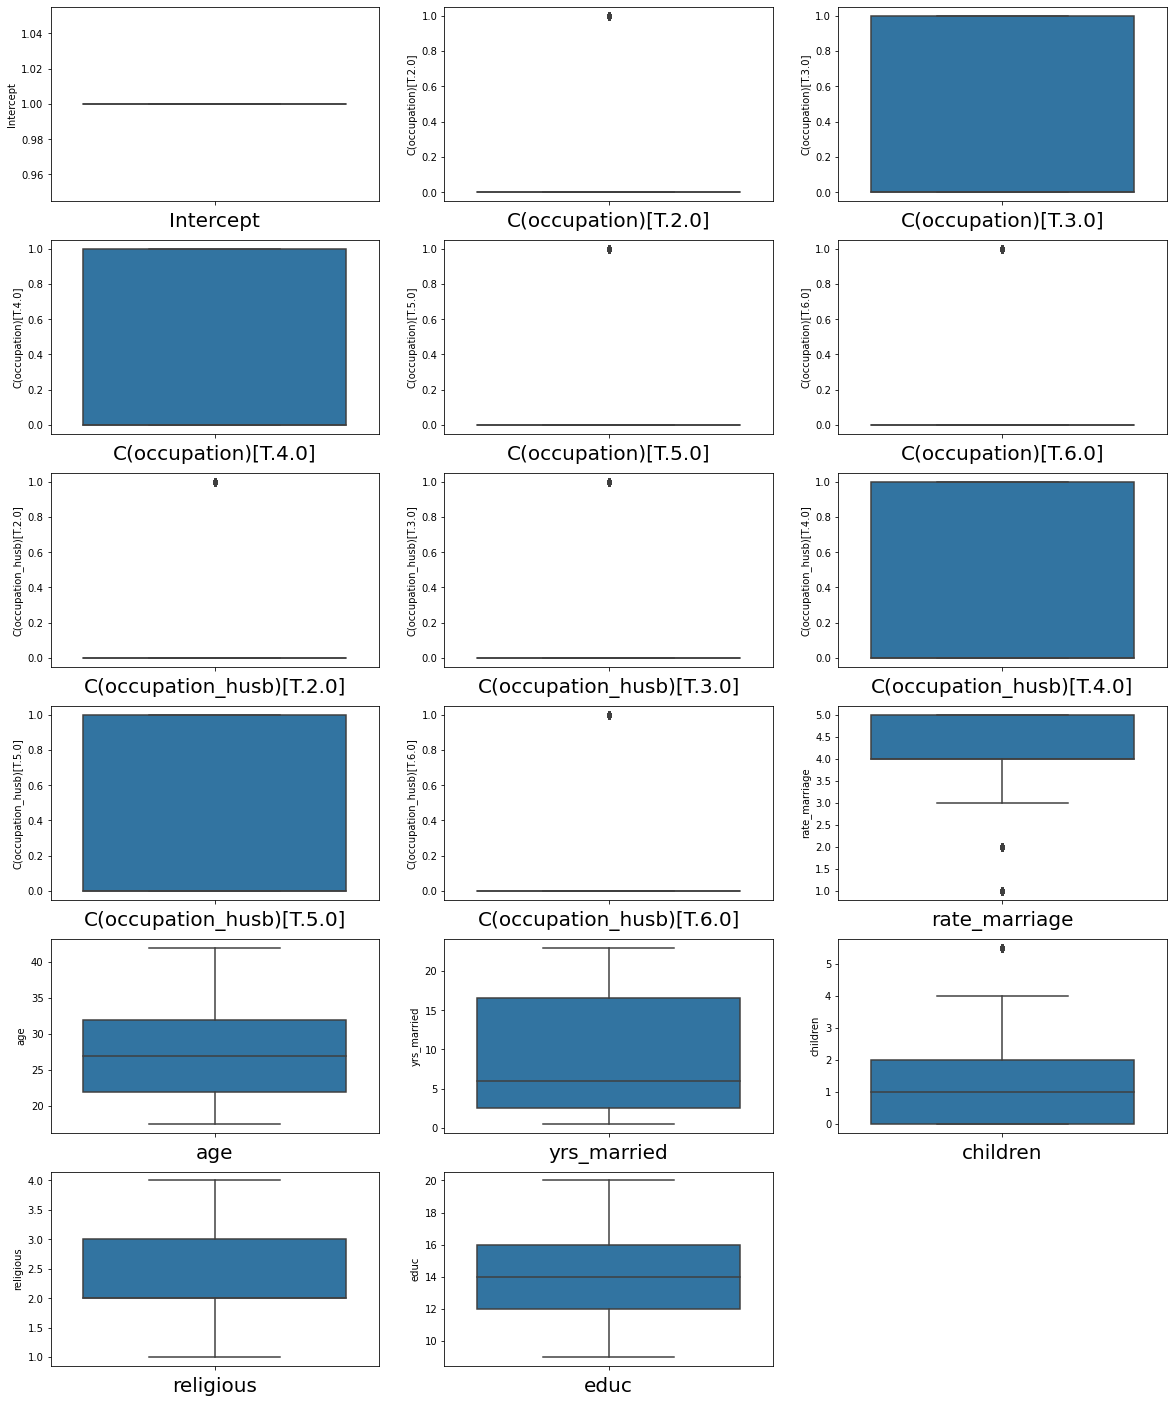

In [7]:
# let's see how box plot for the data for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=18 :   
        ax = plt.subplot(6,3,plotnumber)
        sns.boxplot(y=X[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

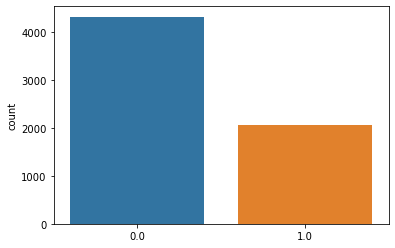

In [8]:
# Distribution of class label
sns.countplot(y)

In [9]:
# Split the data into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Perform standardization on the data
sd = StandardScaler()
sd.fit(X_train)

X_train_sd = sd.transform(X_train)
X_test_sd = sd.transform(X_test)

In [11]:
# Check if features have any collinearity
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_train_sd,i) for i in range(X_train_sd.shape[1])]
vif["Features"] = X.columns
vif

C:\Users\patil\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,24.748612,C(occupation)[T.2.0]
2,51.253074,C(occupation)[T.3.0]
3,42.612408,C(occupation)[T.4.0]
4,21.756087,C(occupation)[T.5.0]
5,4.416558,C(occupation)[T.6.0]
6,5.271856,C(occupation_husb)[T.2.0]
7,2.864330,C(occupation_husb)[T.3.0]
8,6.361130,C(occupation_husb)[T.4.0]
9,6.087699,C(occupation_husb)[T.5.0]


All the VIF values are greater than 5. That means there is multicollinearity present in the data.Dropping features where IVF>5

In [12]:
drop_feat = vif[vif['vif']>5]['Features'].index

X_train_sd = np.delete(X_train_sd,drop_feat,axis=1)
X_test_sd = np.delete(X_test_sd,drop_feat,axis=1)

Now that we have removed multicollinearity from data.Lets fit the model.
We will use Gridsearch cv for tunning hyperparameter

In [13]:
tuned_parameters = [{'C': [10**-4, 10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4],
                     'penalty':['l1','l2']
                    }
                   ]

In [14]:
#Using GridSearchCV
model = GridSearchCV(LogisticRegression(), tuned_parameters,
                     scoring = 'accuracy', cv=5,n_jobs=-1)
model.fit(X_train_sd, y_train)

C:\Users\patil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                10000],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [15]:
model.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [16]:
lr = LogisticRegression(C=model.best_params_['C'], penalty=model.best_params_['penalty'])
lr.fit(X_train_sd, y_train)

C:\Users\patil\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr.score(X_test_sd,y_test)

0.7183246073298429

In [18]:
lr.score(X_train_sd, y_train)

0.7156642728904847

In [19]:
y_pred = lr.predict(X_test_sd)

In [20]:
def Rates(tn,fp,fn,tp):
    TPR=float(tp/(tp+fn))
    TNR=float(tn/(tn+fp))
    FPR=float(fp/(tn+fp))
    FNR=float(fn/(tp+fn))
    print("True Positive Rate or Sensitivity = %f" %(TPR*100))
    print("True Negative Rate or Specificity = %f" %(TNR*100))
    print("False Positive Rate or Fall-out = %f" %(FPR*100))
    print("False Negative Rate or Missclassification rate = %f" %(FNR*100))

In [21]:
tn, fp, fn, tp =confusion_matrix(y_test, y_pred).ravel()
Rates(tn,fp,fn,tp)

True Positive Rate or Sensitivity = 34.488189
True Negative Rate or Specificity = 90.431373
False Positive Rate or Fall-out = 9.568627
False Negative Rate or Missclassification rate = 65.511811


Text(26.5, 0.5, 'True Value')

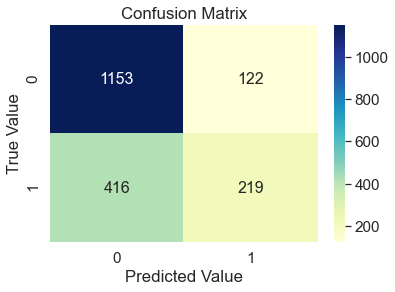

In [22]:
x=confusion_matrix(y_test, y_pred)
cm_df=pd.DataFrame(x,index=[0,1],columns=[0,1])

sns.set(font_scale=1.4,color_codes=True,palette="deep")
sns.heatmap(cm_df,annot=True,annot_kws={"size":16},fmt="d",cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("True Value")